<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/Ativos_Correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm #### biblioteca para plotar correlacao
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
etf_lista = ['SPY', 'GLD', 'XLE', 'XLF', 'XLI', 'XLP']
## extrair dados de uma vez com yf.download
etf = ' '.join(etf_lista)
df  = yf.download (etf,
                   period = "2y",
                   interval = "1d",
                   group_by = 'ticker', ## poderá chamar df[ticker]
                   progress = False)

In [3]:
df['SPY']

Price,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,398.542784,400.001615,396.899166,398.581665,60295300
2023-02-07,397.647979,405.058833,396.383672,403.794525,90990700
2023-02-08,401.791125,403.152694,398.678941,399.379181,76227500
2023-02-09,403.035970,403.191582,394.672003,395.916870,78694900
2023-02-10,394.720661,397.229866,393.894014,396.840851,70769700
...,...,...,...,...,...
2025-01-30,603.960022,606.599976,600.719971,605.039978,39281300
2025-01-31,607.500000,609.960022,601.049988,601.820007,66671500
2025-02-03,592.669983,600.289978,590.489990,597.770020,65857200


In [4]:
### Calcular rentabilidade usando pct_change
for etf in etf_lista:
  df[(etf, 'Return')] = df[(etf, 'Close')].pct_change()

In [5]:
### dataframe dg apenas com rentabilidades de cada etf
colunas = list()
for elem in etf_lista:
    colunas.append((elem, 'Return'))
dg = df.filter(items=colunas)
dg.columns = etf_lista ### muda nome das colunas
dg = dg*100
dg.head()

,SPY,GLD,XLE,XLF,XLI,XLP
Date,,,,,,
2023-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-07,1.307852,0.092043,3.248789,1.148156,0.311894,-0.421818
2023-02-08,-1.093463,0.247159,-0.894161,-0.594596,-0.563542,-0.765229
2023-02-09,-0.866923,-0.791242,-0.856572,-1.114732,-0.898973,-0.440654
2023-02-10,0.233377,0.190719,3.916615,0.329951,0.709921,0.926692


In [6]:
dg.index = dg.index.strftime('%Y-%m-%d')

In [8]:
dg.columns
dg.rename_axis('ds', inplace=True)
dg = dg.dropna()
dg.head()


,SPY,GLD,XLE,XLF,XLI,XLP
ds,,,,,,
2023-02-07,1.307852,0.092043,3.248789,1.148156,0.311894,-0.421818
2023-02-08,-1.093463,0.247159,-0.894161,-0.594596,-0.563542,-0.765229
2023-02-09,-0.866923,-0.791242,-0.856572,-1.114732,-0.898973,-0.440654
2023-02-10,0.233377,0.190719,3.916615,0.329951,0.709921,0.926692
2023-02-13,1.173891,-0.507617,-0.254958,1.150999,0.910524,1.137448


In [9]:
dg.to_csv('variacoes_acoes.csv',sep=';')

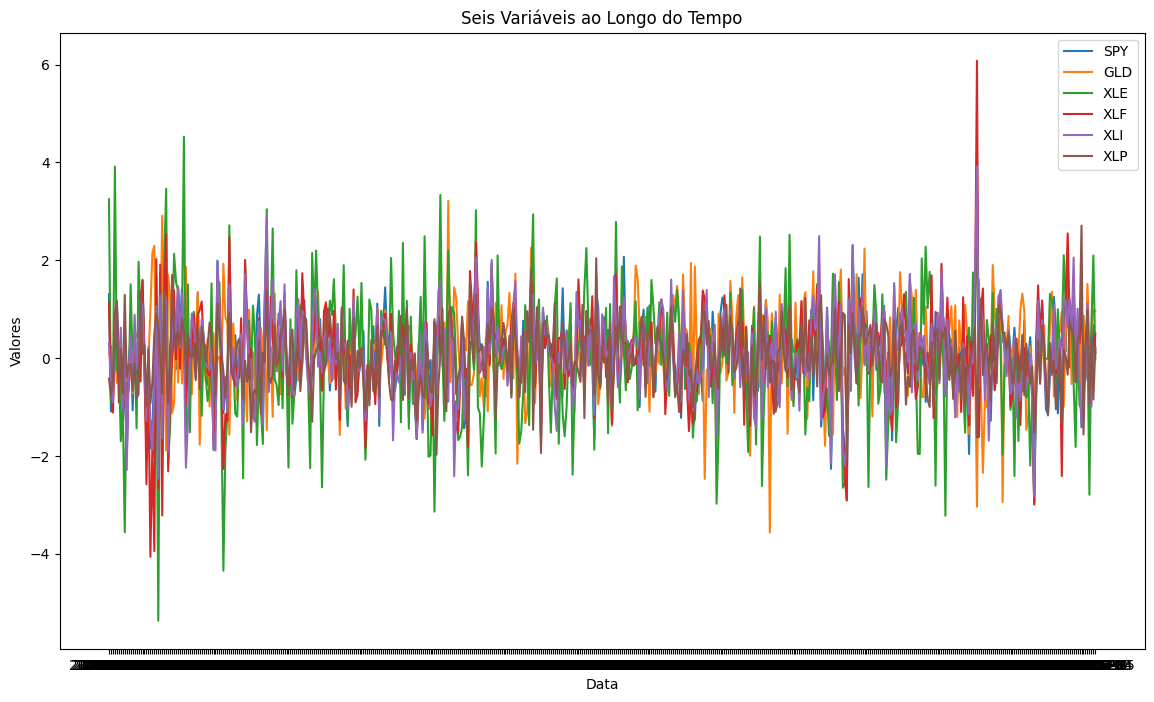

In [10]:
plt.figure(figsize=(14, 8))
plt.plot(dg.index, dg['SPY'], label='SPY')
plt.plot(dg.index, dg['GLD'], label='GLD')
plt.plot(dg.index, dg['XLE'], label='XLE')
plt.plot(dg.index, dg['XLF'], label='XLF')
plt.plot(dg.index, dg['XLI'], label='XLI')
plt.plot(dg.index, dg['XLP'], label='XLP')

# Adicionando título e rótulos
plt.title('Seis Variáveis ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valores')

# Exibindo a legenda
plt.legend()

# Mostrando o gráfico
plt.show()

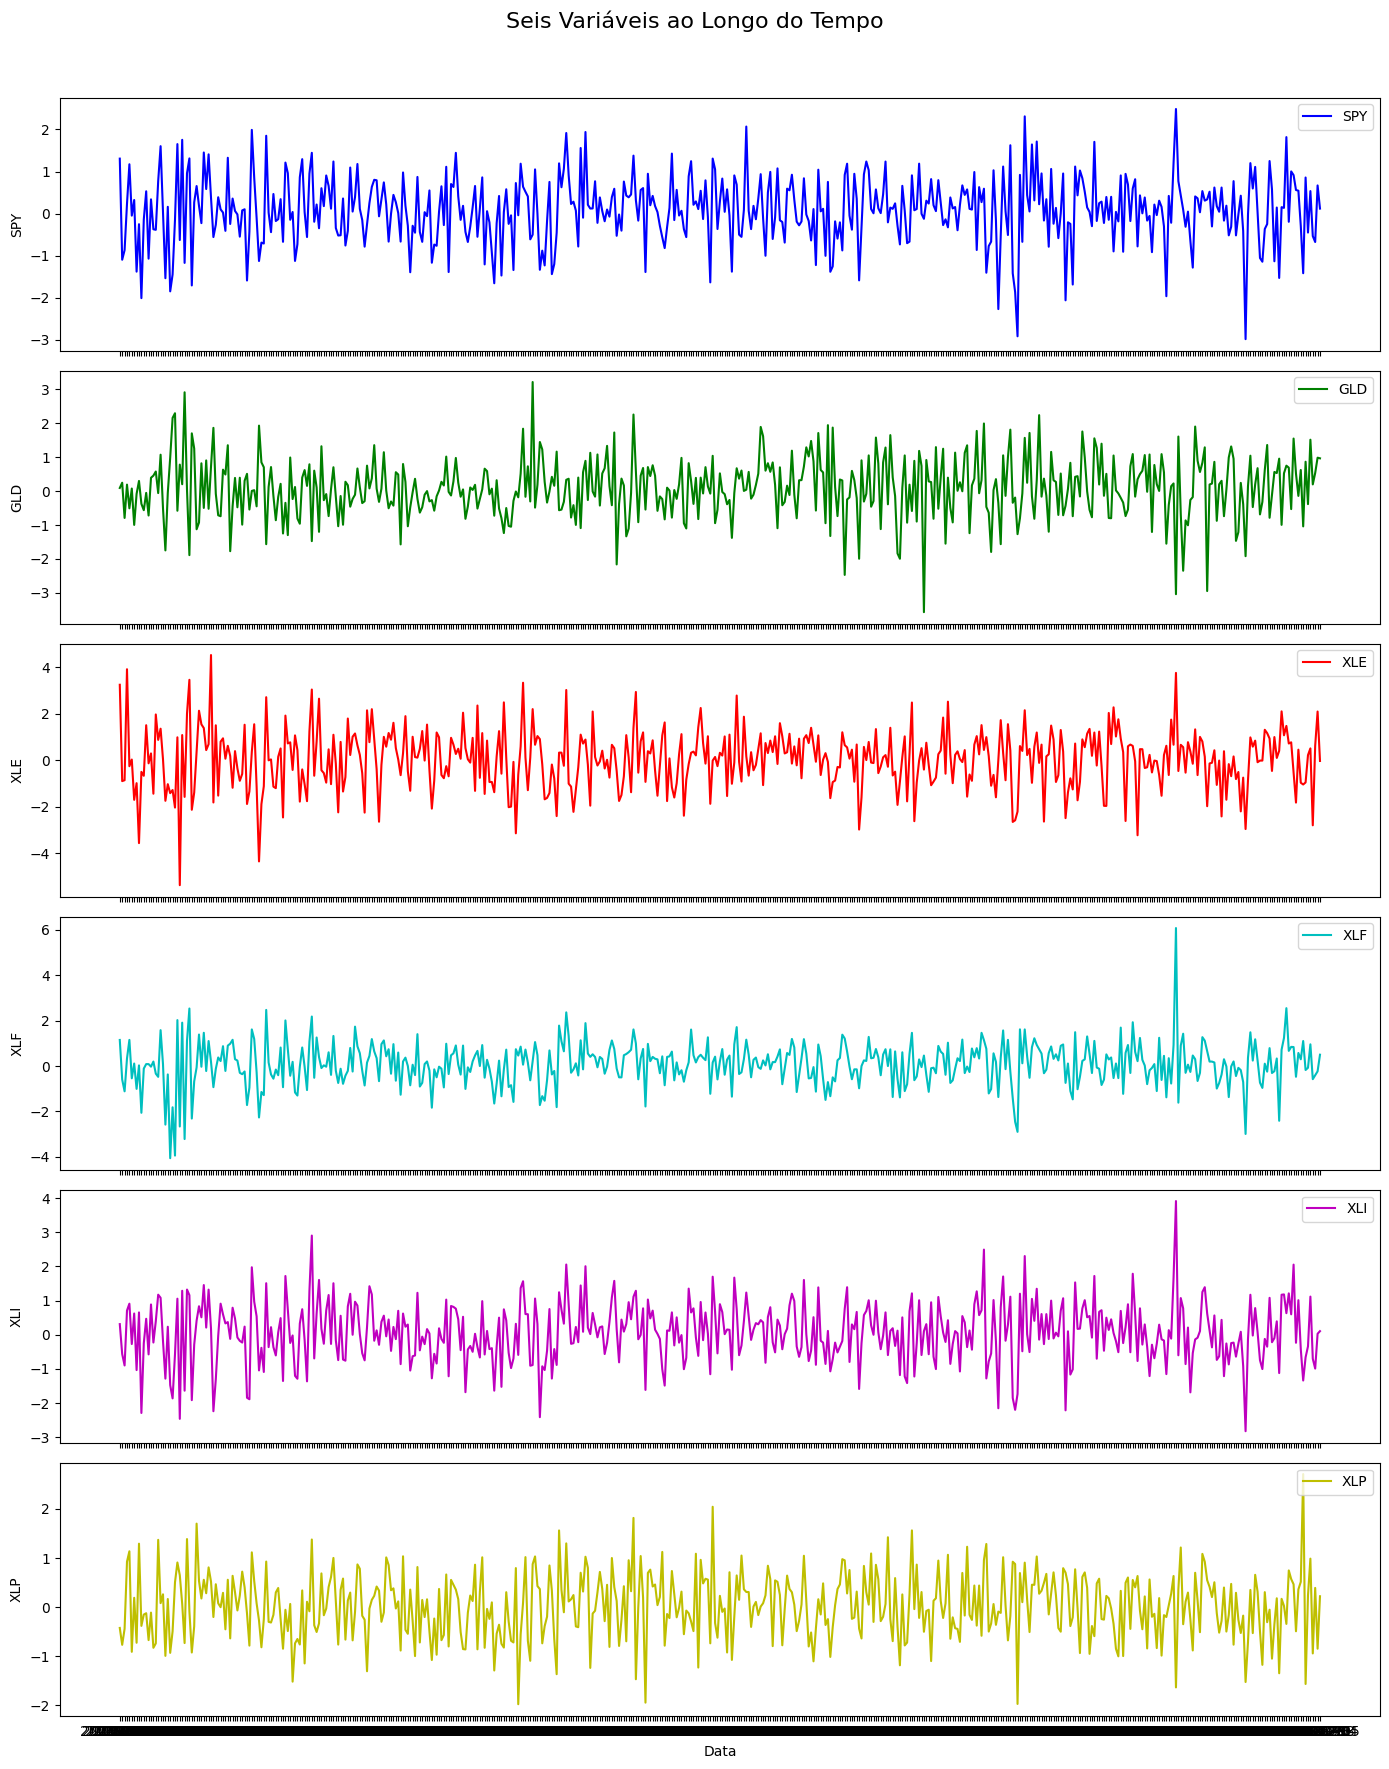

In [11]:
fig, axs = plt.subplots(6, 1, figsize=(14, 18), sharex=True)

# Plotando cada variável em um subplot
axs[0].plot(dg.index, dg['SPY'], label='SPY', color='b')
axs[0].set_ylabel('SPY')
axs[0].legend(loc='upper right')

axs[1].plot(dg.index, dg['GLD'], label='GLD', color='g')
axs[1].set_ylabel('GLD')
axs[1].legend(loc='upper right')

axs[2].plot(dg.index, dg['XLE'], label='XLE', color='r')
axs[2].set_ylabel('XLE')
axs[2].legend(loc='upper right')

axs[3].plot(dg.index, dg['XLF'], label='XLF', color='c')
axs[3].set_ylabel('XLF')
axs[3].legend(loc='upper right')

axs[4].plot(dg.index, dg['XLI'], label='XLI', color='m')
axs[4].set_ylabel('XLI')
axs[4].legend(loc='upper right')

axs[5].plot(dg.index, dg['XLP'], label='XLP', color='y')
axs[5].set_ylabel('XLP')
axs[5].legend(loc='upper right')

# Adicionando título comum e rótulos
fig.suptitle('Seis Variáveis ao Longo do Tempo', fontsize=16)
plt.xlabel('Data')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrando o gráfico
plt.show()

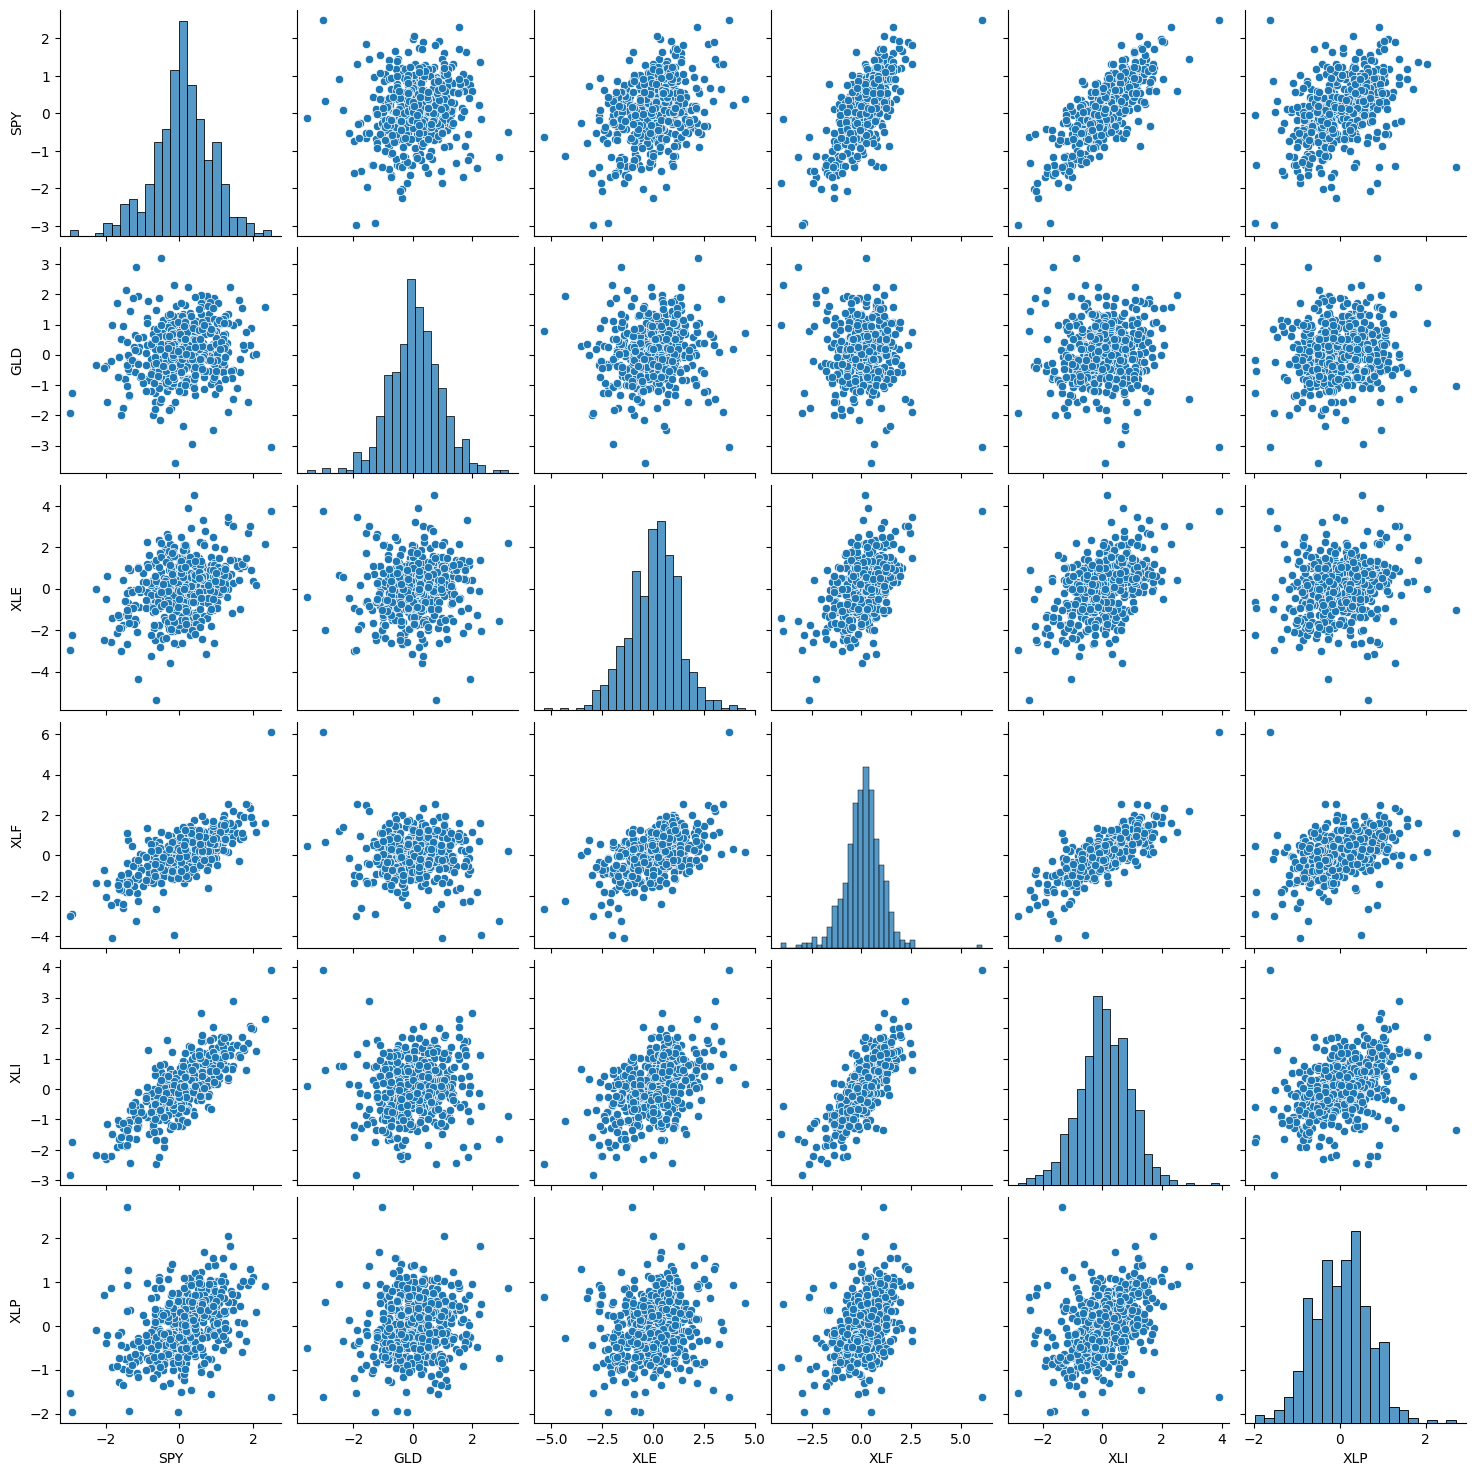

In [12]:
sns.pairplot(dg, kind="scatter")
plt.show()

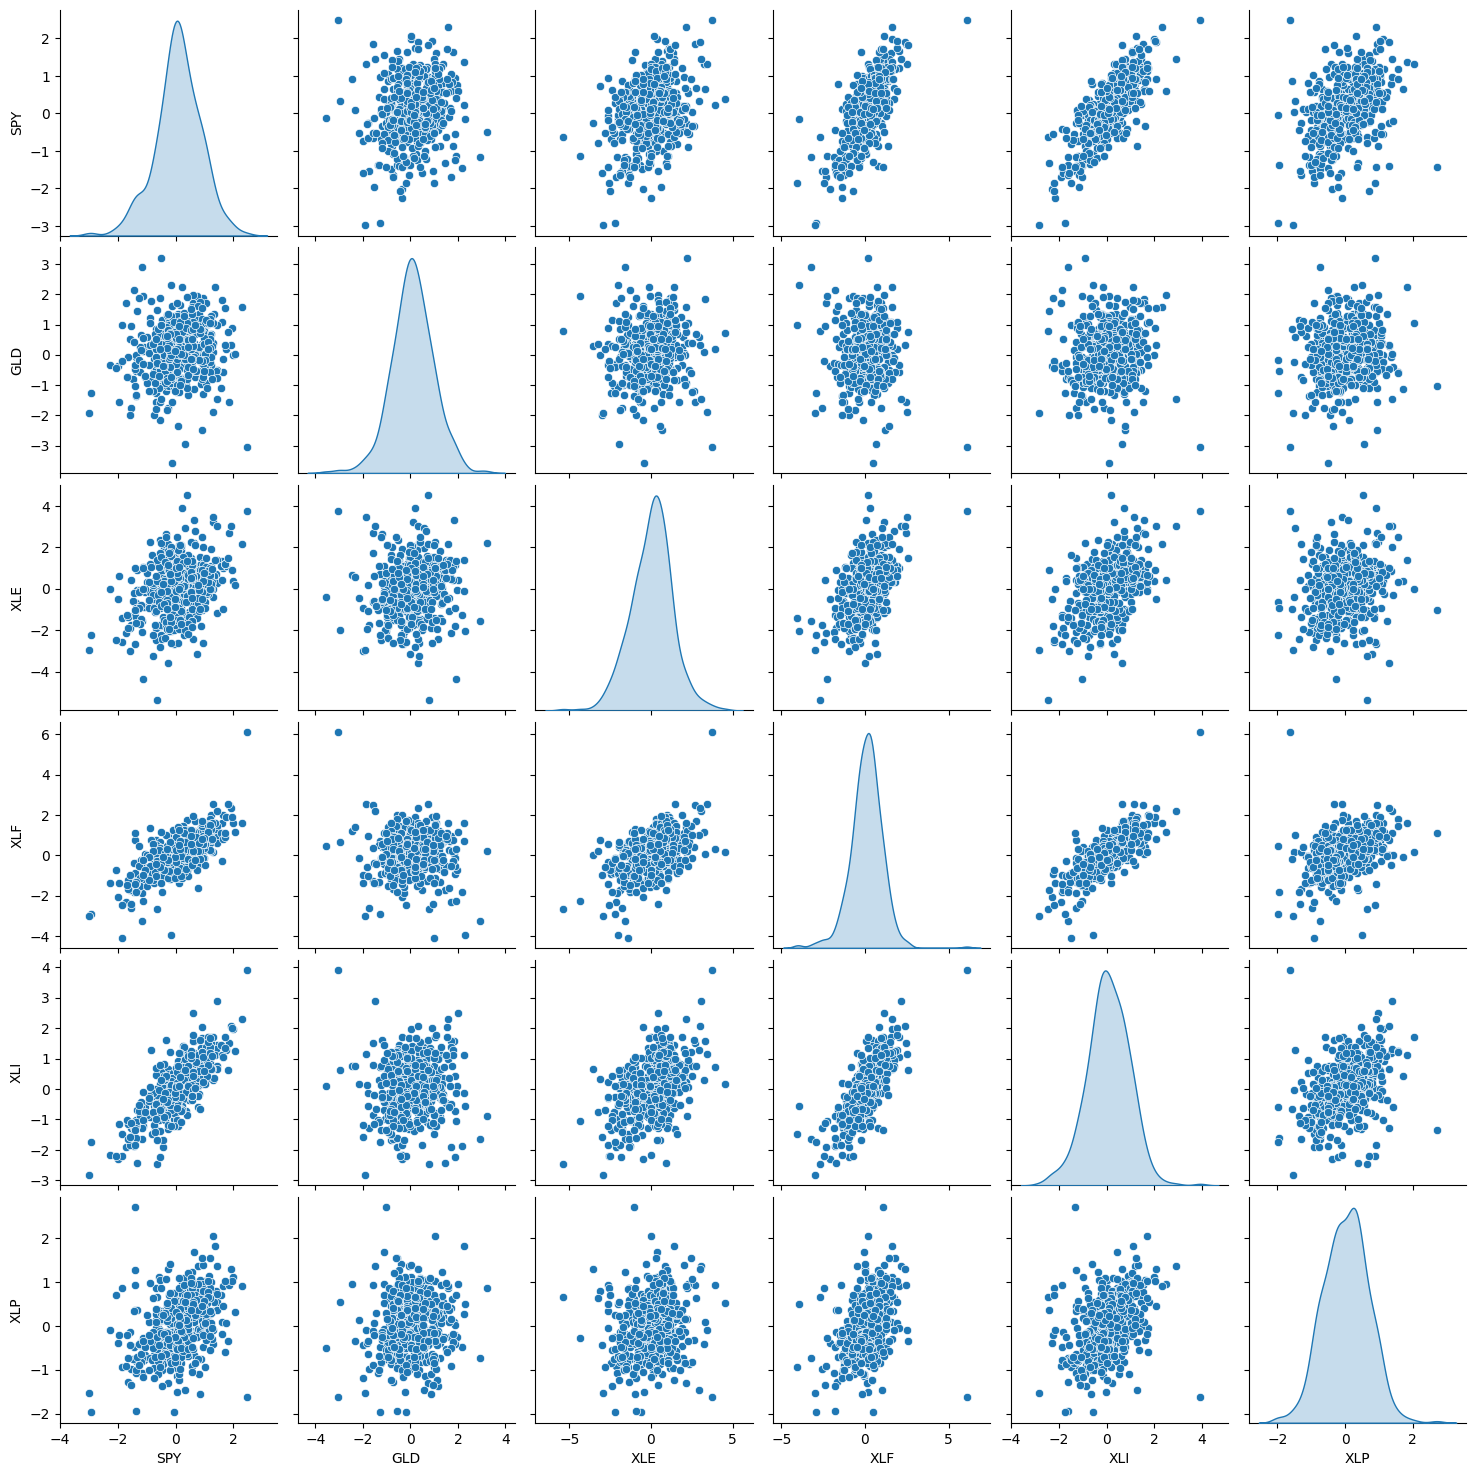

In [13]:
sns.pairplot(dg, diag_kind="kde")

In [14]:
correlacao = dg.corr()
correlacao

,SPY,GLD,XLE,XLF,XLI,XLP
SPY,1.000000,0.129137,0.354049,0.708513,0.793409,0.394138
GLD,0.129137,1.000000,0.089078,-0.038590,0.073232,0.104598
XLE,0.354049,0.089078,1.000000,0.520521,0.494785,0.179684
XLF,0.708513,-0.038590,0.520521,1.000000,0.779132,0.416892
XLI,0.793409,0.073232,0.494785,0.779132,1.000000,0.391398
XLP,0.394138,0.104598,0.179684,0.416892,0.391398,1.000000


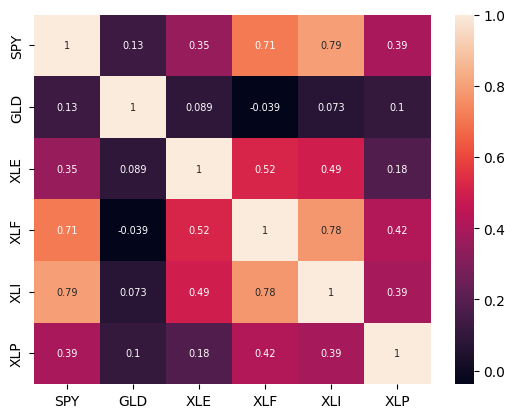

In [15]:
sns.heatmap(correlacao, annot=True, annot_kws={"size": 7})
plt.show()

In [16]:
### calcular desvio padrão do portfólio de etf usando matriz de correlação
pesos = [30, 10, 15, 25, 10, 10]
carteira = np.dot(dg, pesos)
carteira = pd.DataFrame(carteira)
carteira_dvp = carteira.std()
carteira_dvp[0]

67.66968530770461

In [17]:
carteira_dvp

,0
0,67.669685


In [18]:
### calcular desvio padrão do portfólio de etf usando matriz de correlação
pesos = [30, 10, 15, 25, 10, 10]
dvp = dg.std() ### serie de desvio padrão para cada etf
matriz = pesos*dvp
### para multiplicar de matrizes, pode utilizar np.matmul ou np.dot
# port_var = np.matmul(matriz, np.matmul(correlacao, matriz))
port_var = np.dot(matriz, np.dot(correlacao, matriz))

In [19]:
port_dvp = np.sqrt(port_var)
port_dvp

67.6696853077046